In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_races = pd.read_csv("../data/races.csv")
print("Races data info:")
print(df_races.info())
print(df_races.head(), "\n")

df_drivers = pd.read_csv("../data/drivers.csv")
print("Drivers data info:")
print(df_drivers.info())
print(df_drivers.head(), "\n")

df_constructors = pd.read_csv("../data/constructors.csv")
print("Constructors data info:")
print(df_constructors.info())
print(df_constructors.head(), "\n")

df_results = pd.read_csv("../data/results.csv")
print("Results data info:")
print(df_results.info())
print(df_results.head(), "\n")

df_qualifying = pd.read_csv("../data/qualifying.csv")
print("Qualifying data info:")
print(df_qualifying.info())
print(df_qualifying.head(), "\n")

Races data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1125 non-null   int64 
 1   year         1125 non-null   int64 
 2   round        1125 non-null   int64 
 3   circuitId    1125 non-null   int64 
 4   name         1125 non-null   object
 5   date         1125 non-null   object
 6   time         1125 non-null   object
 7   url          1125 non-null   object
 8   fp1_date     1125 non-null   object
 9   fp1_time     1125 non-null   object
 10  fp2_date     1125 non-null   object
 11  fp2_time     1125 non-null   object
 12  fp3_date     1125 non-null   object
 13  fp3_time     1125 non-null   object
 14  quali_date   1125 non-null   object
 15  quali_time   1125 non-null   object
 16  sprint_date  1125 non-null   object
 17  sprint_time  1125 non-null   object
dtypes: int64(4), object(14)
memory usage: 158.3+ KB
Non

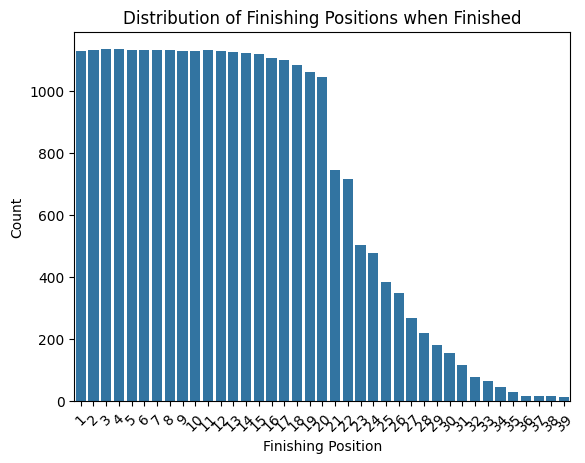

In [ ]:
#Finishing position

finish_only = df_results[df_results['positionOrder'] > 0]

sns.countplot(x='positionOrder', data=finish_only)
plt.title("Distribution of Finishing Positions when Finished")
plt.xlabel("Finishing Position")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


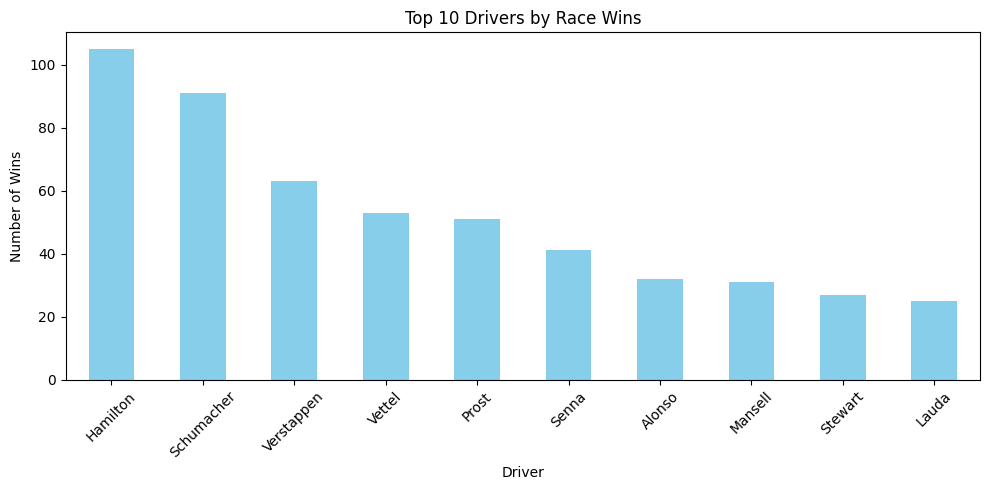

In [ ]:
#Drivers ranked by race wins


top_drivers = df_results[df_results['positionOrder']==1]['driverId'].value_counts()
driver_id_to_name = dict(zip(df_drivers['driverId'], df_drivers['surname']))
top_drivers.index = top_drivers.index.map(driver_id_to_name)
top_drivers = top_drivers.dropna()

top_drivers.head(10).plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title("Top 10 Drivers by Race Wins")
plt.xlabel("Driver")
plt.ylabel("Number of Wins")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

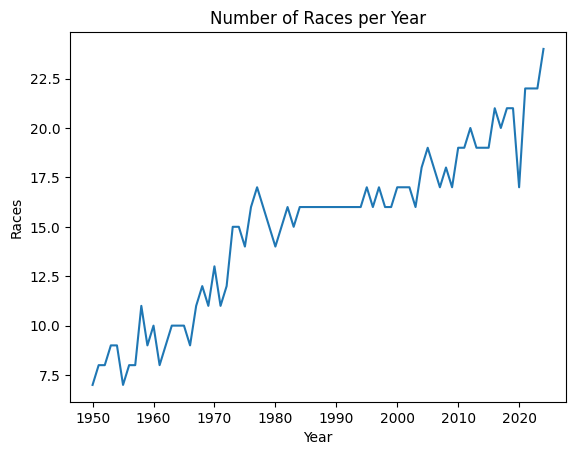

In [ ]:
#number of races per year

races_per_year = df_races['year'].value_counts().sort_index()
races_per_year.plot(kind='line')
plt.title("Number of Races per Year")
plt.xlabel("Year")
plt.ylabel("Races")
plt.show()

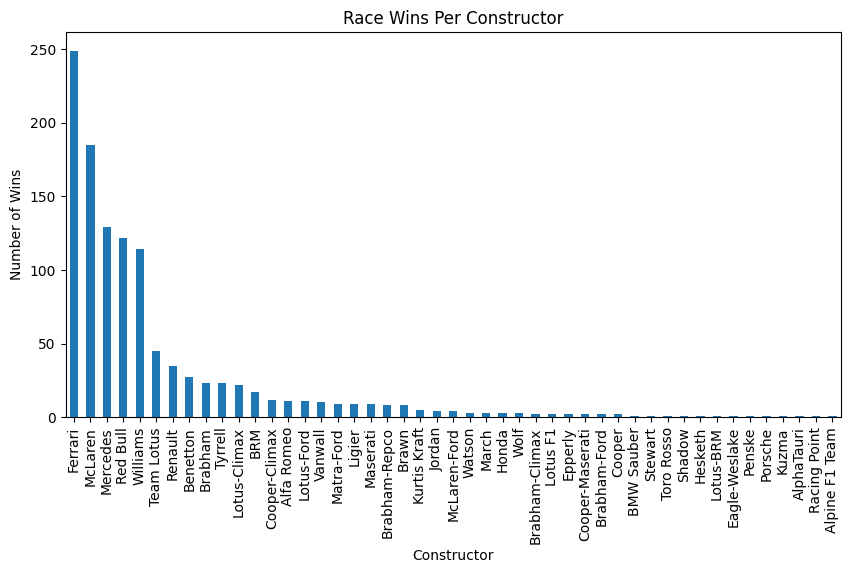

In [16]:
#Constructor wins

team_wins = df_results[df_results['positionOrder']==1]['constructorId'].value_counts()
constructor_id_to_name = dict(zip(df_constructors['constructorId'], df_constructors['name']))
team_wins.index = team_wins.index.map(constructor_id_to_name)
team_wins.plot(kind='bar', figsize=(10,5))
plt.title("Race Wins Per Constructor")
plt.xlabel("Constructor")
plt.ylabel("Number of Wins")
plt.show()